In [1]:
from fastai.vision import *
import os
import glob

print(torch.cuda.is_available())
print(os.getcwd())
torch.cuda.empty_cache()

True
/home/lh2910


In [2]:
labels = pd.read_csv('/home/lh2910/list_attr_celeba.csv')
labels.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [3]:
def labels_as_string(data, row_array):
    a = data.columns.values[1:]
    b = row_array.iloc[1:]
    c = ' '.join(a[b > 0])
    return c

In [4]:
foo = labels.apply(lambda x: labels_as_string(labels, x), axis=1)
labels['multi'] = foo

In [5]:
os.chdir('/home/lh2910/faces')
path = os.getcwd()
extracted_faces = glob.glob('*.jpg')
extracted_faces.sort()

A = set(extracted_faces)
slices = []
for i in labels.loc[:, 'image_id']:
    if i in A:
        slices.append(True)
    else:
        slices.append(False)

multi = labels.loc[slices, ['image_id', 'multi']]
multi.head()

,image_id,multi
0,000001.jpg,Arched_Eyebrows Attractive Brown_Hair Heavy_Ma...
1,000002.jpg,Bags_Under_Eyes Big_Nose Brown_Hair High_Cheek...
4,000005.jpg,Arched_Eyebrows Attractive Big_Lips Heavy_Make...
5,000006.jpg,Arched_Eyebrows Attractive Big_Lips Brown_Hair...
6,000007.jpg,5_o_Clock_Shadow Attractive Bags_Under_Eyes Bi...


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


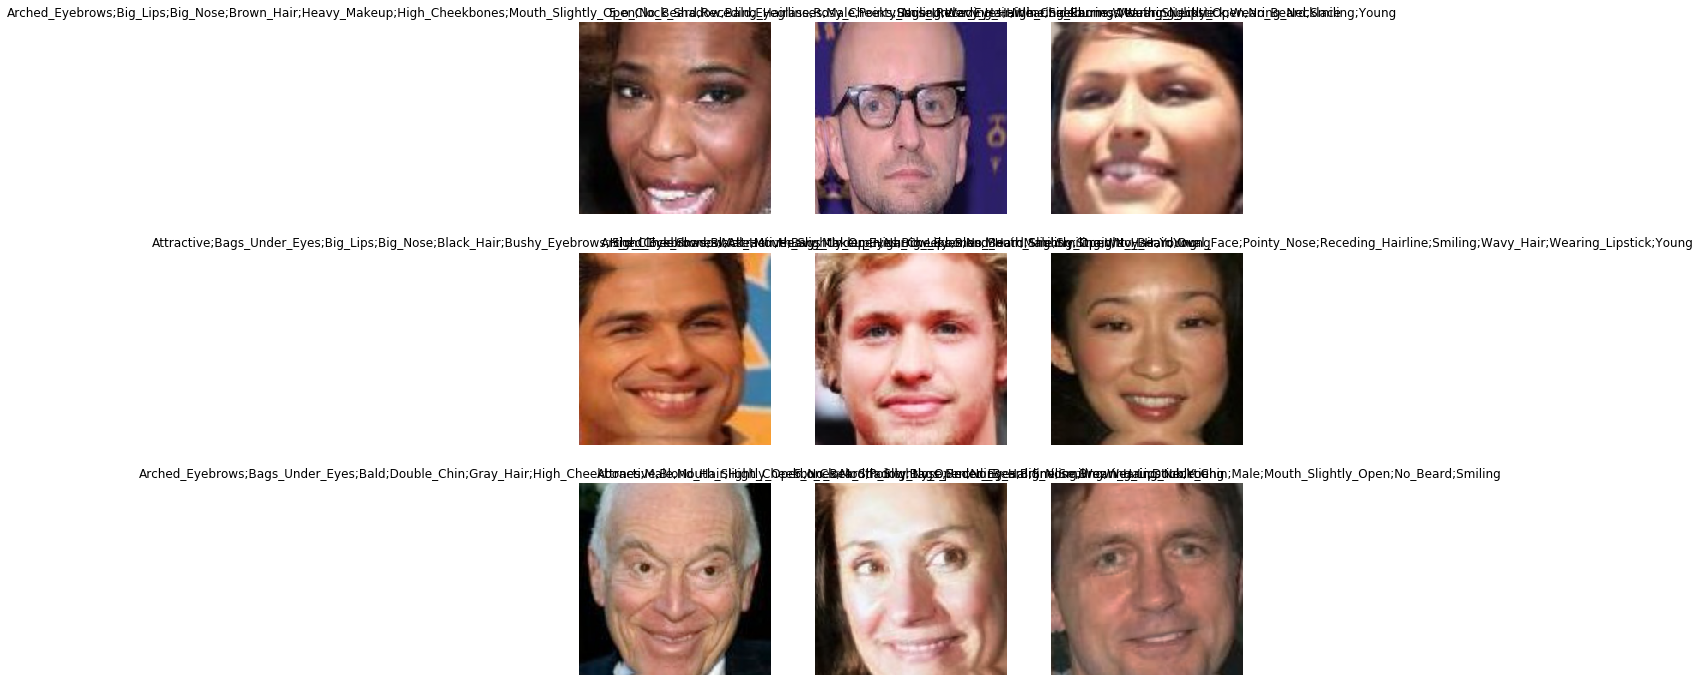

In [6]:
tfms = get_transforms(do_flip=True, flip_vert=False,
                      p_affine=.75, p_lighting=.75,
                      max_lighting=.2, max_rotate=10, max_warp=.2, max_zoom=1.1)

data = (ImageList.from_df(multi, path=path)
        .split_by_rand_pct(.05)
        .label_from_df(cols=1, label_delim=' ')
        .transform(tfms, size=224)
        .databunch()
        .normalize())
        
data.show_batch(rows=3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-02


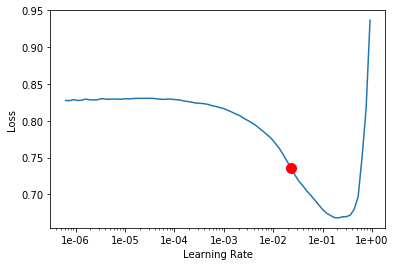

In [7]:
arch = models.resnet50
learn = cnn_learner(data, arch, metrics=[accuracy_thresh])
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [8]:
# lr = 1e-3
# learn.fit_one_cycle(1, slice(lr))

In [9]:
# https://github.com/fastai/fastai/blob/master/fastai/basic_train.py#L190
 # uses defaults.lr = slice(3e-3)
learn.fit(5)

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.235513,0.218691,0.902713,38:16
1,0.225805,0.210983,0.906090,38:09
2,0.223606,0.207097,0.907335,38:06
3,0.219102,0.203905,0.908844,38:07
4,0.217510,0.202060,0.909528,38:09


In [10]:
# Save/Load as .pth

# To Save
learn.save('/home/lh2910/models/multi_resnet50')

# To Load
# data = ... 
# learn = cnn_learner(data, models.resnet50, pretrained=False)
# learn.load(path+'/models/male_resnet50')

In [11]:
# Save/Load as .pkl

# To Save
learn.export('/home/lh2910/models/multi_resnet50.pkl')

# To Load
# learn = load_learner(path+'/models', 'male_resnet50.pkl')

In [12]:
# learn.model.eval()

Label: Arched_Eyebrows;Attractive;Blond_Hair;Heavy_Makeup;High_Cheekbones;No_Beard;Oval_Face;Rosy_Cheeks;Wavy_Hair;Wearing_Lipstick;Young
Prediction: (MultiCategory Arched_Eyebrows;Attractive;Blond_Hair;Heavy_Makeup;High_Cheekbones;No_Beard;Oval_Face;Pointy_Nose;Smiling;Straight_Hair;Wearing_Lipstick;Young, tensor([0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
        1., 0., 0., 1.]), tensor([1.0182e-06, 5.7630e-01, 9.8352e-01, 7.1242e-03, 5.2485e-06, 2.0767e-03,
        1.4617e-01, 4.3376e-03, 1.1187e-04, 9.9762e-01, 2.6962e-05, 3.8505e-04,
        1.9876e-03, 1.0081e-04, 6.0824e-05, 1.8290e-07, 3.1947e-07, 2.9559e-04,
        9.9305e-01, 9.8052e-01, 5.9263e-07, 1.6666e-02, 3.1343e-07, 1.3037e-02,
        1.0000e+00, 7.6593e-01, 1.5233e-02, 6.0778e-01, 1.6629e-03, 2.9720e-01,
        1.1228e-07, 8.8996e-01, 5.9323e-01, 1.5372e-01, 2.1693e-02, 1.6024e-06,
        9.9934e-01, 1.619

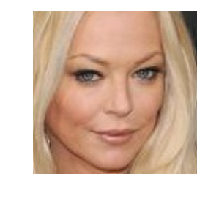

In [13]:
img, category = data.valid_ds[150]
print('Label:', category)
print('Prediction:', learn.predict(img))
img.show()

(MultiCategory Big_Nose;Chubby;Eyeglasses;Male;Smiling;Wearing_Hat;Young, tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 0., 1.]), tensor([3.7162e-01, 5.1335e-03, 6.4707e-02, 1.2137e-01, 2.9217e-03, 7.5454e-02,
        1.8398e-01, 7.9855e-01, 4.2078e-01, 6.9607e-04, 3.0968e-03, 9.2146e-02,
        3.1200e-02, 6.5050e-01, 4.0882e-01, 9.9998e-01, 2.1916e-01, 1.1021e-02,
        8.5084e-04, 3.1983e-01, 9.9746e-01, 4.1133e-02, 1.6246e-01, 6.7705e-02,
        2.4445e-01, 2.9842e-01, 1.8191e-02, 3.2953e-02, 6.3908e-03, 3.1525e-03,
        2.4746e-02, 7.4697e-01, 2.5536e-01, 1.0019e-01, 1.9544e-02, 5.7765e-01,
        1.6497e-03, 3.0487e-02, 2.2539e-01, 5.3883e-01]))


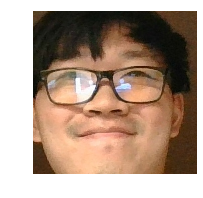

In [14]:
import cv2
os.chdir('/home/lh2910/')

img_bgr = cv2.imread('test/01.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
tensor = pil2tensor(img_rgb, np.float32).div_(255)
img_fastai = Image(tensor)

print(learn.predict(img_fastai))
img_fastai.show() # uses matplotlib